In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import optuna

In [2]:
file_path = 'C:/Users/k/Desktop/硕士论文/SO4/SO4_240301/function/train.xlsx'
sheet_name = 'Sheet1'
data = pd.read_excel(file_path, sheet_name=sheet_name)
y_train = data.iloc[:, -1]
X_train = data.iloc[:, 1:-1]

file_path = 'C:/Users/k/Desktop/硕士论文/SO4/SO4_240301/function/test.xlsx'
sheet_name = 'Sheet1'
data = pd.read_excel(file_path, sheet_name=sheet_name)
y_test = data.iloc[:, -1]
X_test = data.iloc[:, 1:-1]

In [3]:
# 定义优化目标函数
def objective(trial):
    C = trial.suggest_loguniform('C', 0.1, 1000.0)
    gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    model = SVR(C=C, gamma=gamma, kernel=kernel)
    
    # 使用 K 折交叉验证，计算均方误差的负值（因为 Optuna 默认最小化目标）
    kfold = KFold(n_splits=10, shuffle=True, random_state=99)
    neg_mse = -np.mean(cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
    return neg_mse

In [4]:
# 创建 Optuna 优化对象
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

[I 2024-03-09 13:20:05,361] A new study created in memory with name: no-name-945be599-1433-4b63-a003-51e829723b92
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:20:05,419] Trial 0 finished with value: 0.6252962089891424 and parameters: {'C': 0.992028196685902, 'gamma': 0.017400046497403128, 'kernel': 'rbf'}. Best is trial 0 with value: 0.6252962089891424.
C:\Users\k\AppData\Local\Temp\i

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:20:30,533] Trial 10 finished with value: 0.8257343414423872 and parameters: {'C': 62.36472915773754, 'gamma': 0.012684953038785115, 'kernel': 'linear'}. Best is trial 0 with value: 0.6252962089891424.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

[I 2024-03-09 13:25:53,740] Trial 19 finished with value: 782.4985174124397 and parameters: {'C': 1.1985178440437452, 'gamma': 6.338129152106954, 'kernel': 'poly'}. Best is trial 0 with value: 0.6252962089891424.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:25:53,799] Trial 20 finished with value: 0.7365855838285789 and parameters: {'C': 6.155011792803663, 'gamma': 0.00207114584247544

[I 2024-03-09 13:25:54,527] Trial 29 finished with value: 0.5997403893153417 and parameters: {'C': 43.116322115827, 'gamma': 0.0034013333235972504, 'kernel': 'rbf'}. Best is trial 28 with value: 0.5496328400626165.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:25:54,615] Trial 30 finished with value: 0.5514816422189208 and parameters: {'C': 128.41957792382289, 'gamma': 0.00448405267589

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:25:57,447] Trial 40 finished with value: 3.7335054460294486 and parameters: {'C': 59.738125316943034, 'gamma': 0.039389589318416816, 'kernel': 'poly'}. Best is trial 31 with value: 0.5477020561692342.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:25:58,469] Trial 50 finished with value: 0.6734448843400431 and parameters: {'C': 47.852121953417935, 'gamma': 0.043042875582970964, 'kernel': 'rbf'}. Best is trial 47 with value: 0.5468459362473639.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:26:06,747] Trial 60 finished with value: 1.4877742816667427 and parameters: {'C': 2.5956544624570412, 'gamma': 0.00922652148207244, 'kernel': 'poly'}. Best is trial 57 with value: 0.5337790991464999.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:26:07,573] Trial 70 finished with value: 0.811495074156768 and parameters: {'C': 4.269938950667639, 'gamma': 0.028523356163436996, 'kernel': 'linear'}. Best is trial 65 with value: 0.49825591252854906.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature

[I 2024-03-09 13:29:32,827] Trial 79 finished with value: 93.99439603001716 and parameters: {'C': 1.8854866427219075, 'gamma': 1.9677692143437941, 'kernel': 'poly'}. Best is trial 65 with value: 0.49825591252854906.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:32,893] Trial 80 finished with value: 0.49775800404117776 and parameters: {'C': 3.9802268051222036, 'gamma': 0.088983065639

[I 2024-03-09 13:29:33,476] Trial 89 finished with value: 0.7862512827343042 and parameters: {'C': 0.9753333260066164, 'gamma': 0.599912884984124, 'kernel': 'linear'}. Best is trial 82 with value: 0.4870864111500649.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:33,531] Trial 90 finished with value: 1.0834158028321992 and parameters: {'C': 0.5276091903604274, 'gamma': 0.293470367497

[I 2024-03-09 13:29:34,053] Trial 99 finished with value: 1.4489653009375465 and parameters: {'C': 1.3563057591107723, 'gamma': 0.01614162695803571, 'kernel': 'poly'}. Best is trial 82 with value: 0.4870864111500649.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:34,115] Trial 100 finished with value: 0.47746897662171967 and parameters: {'C': 2.2943498708846697, 'gamma': 0.0852239457

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:34,861] Trial 110 finished with value: 0.8111264092935178 and parameters: {'C': 2.795900415172224, 'gamma': 0.045781539527127775, 'kernel': 'linear'}. Best is trial 103 with value: 0.47208879257186787.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feat

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:35,544] Trial 120 finished with value: 1.4515011237411155 and parameters: {'C': 5.795915873303697, 'gamma': 0.04487553826915193, 'kernel': 'poly'}. Best is trial 111 with value: 0.4687337903711407.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:36,175] Trial 130 finished with value: 0.49190685299684267 and parameters: {'C': 9.077893184245614, 'gamma': 0.03624660781742217, 'kernel': 'rbf'}. Best is trial 111 with value: 0.4687337903711407.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:37,007] Trial 140 finished with value: 0.5153586371185467 and parameters: {'C': 7.948921037588174, 'gamma': 0.0687232902851035, 'kernel': 'rbf'}. Best is trial 111 with value: 0.4687337903711407.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature wi

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:37,646] Trial 150 finished with value: 0.5852816906970725 and parameters: {'C': 3.1440893721151375, 'gamma': 0.20381687749569133, 'kernel': 'rbf'}. Best is trial 111 with value: 0.4687337903711407.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:38,286] Trial 160 finished with value: 0.5454327752257495 and parameters: {'C': 6.566862463331721, 'gamma': 0.11130431960127221, 'kernel': 'rbf'}. Best is trial 111 with value: 0.4687337903711407.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:39,133] Trial 170 finished with value: 0.5459232435565431 and parameters: {'C': 2.870027797751591, 'gamma': 0.16607702943517894, 'kernel': 'rbf'}. Best is trial 111 with value: 0.4687337903711407.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:39,758] Trial 180 finished with value: 1.4377900941980282 and parameters: {'C': 4.104291650260158, 'gamma': 0.011841122742019799, 'kernel': 'poly'}. Best is trial 111 with value: 0.4687337903711407.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:40,398] Trial 190 finished with value: 0.49548932375766014 and parameters: {'C': 3.225738405847281, 'gamma': 0.0956548712669629, 'kernel': 'rbf'}. Best is trial 111 with value: 0.4687337903711407.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:41,112] Trial 200 finished with value: 0.8035281763821575 and parameters: {'C': 2.0463106596336638, 'gamma': 0.1447605476352215, 'kernel': 'linear'}. Best is trial 111 with value: 0.4687337903711407.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:41,729] Trial 210 finished with value: 0.4828942814785798 and parameters: {'C': 2.140205333001767, 'gamma': 0.09135359058941026, 'kernel': 'rbf'}. Best is trial 111 with value: 0.4687337903711407.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2024-03-09 13:29:42,476] Trial 219 finished with value: 1.8982991661313915 and parameters: {'C': 2.376191593413974, 'gamma': 0.08496962455820446, 'kernel': 'poly'}. Best is trial 216 with value: 0.46837135256586293.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:42,536] Trial 220 finished with value: 0.5179170336732299 and parameters: {'C': 2.0613817425282255, 'gamma': 0.150871424

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:43,164] Trial 230 finished with value: 0.4896639060504736 and parameters: {'C': 2.5842423072981253, 'gamma': 0.04550563222374906, 'kernel': 'rbf'}. Best is trial 226 with value: 0.46836859439159706.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:43,830] Trial 240 finished with value: 0.4748621648265905 and parameters: {'C': 2.4277010646728536, 'gamma': 0.060311769162985314, 'kernel': 'rbf'}. Best is trial 226 with value: 0.46836859439159706.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:44,532] Trial 250 finished with value: 0.47334255400726655 and parameters: {'C': 3.0559861411186167, 'gamma': 0.07004953867646081, 'kernel': 'rbf'}. Best is trial 226 with value: 0.46836859439159706.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:45,521] Trial 260 finished with value: 0.4991798237028286 and parameters: {'C': 3.0666152889983427, 'gamma': 0.10299505337456624, 'kernel': 'rbf'}. Best is trial 226 with value: 0.46836859439159706.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature

[I 2024-03-09 13:29:46,069] Trial 269 finished with value: 0.468509545874147 and parameters: {'C': 2.5654902428674347, 'gamma': 0.06612840690399158, 'kernel': 'rbf'}. Best is trial 226 with value: 0.46836859439159706.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:46,279] Trial 270 finished with value: 0.8105623229839501 and parameters: {'C': 3.090176280406104, 'gamma': 0.11389673315

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:46,900] Trial 280 finished with value: 0.4845972641886501 and parameters: {'C': 2.0005309062764987, 'gamma': 0.0955737226816429, 'kernel': 'rbf'}. Best is trial 226 with value: 0.46836859439159706.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:47,548] Trial 290 finished with value: 0.4753516791513569 and parameters: {'C': 2.712218306401639, 'gamma': 0.05356903947936249, 'kernel': 'rbf'}. Best is trial 226 with value: 0.46836859439159706.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:48,312] Trial 300 finished with value: 0.47647016890851307 and parameters: {'C': 2.6084097720305164, 'gamma': 0.05419667025042967, 'kernel': 'rbf'}. Best is trial 226 with value: 0.46836859439159706.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:48,945] Trial 310 finished with value: 1.2847077868013448 and parameters: {'C': 1.8260582333631066, 'gamma': 1.0982100772967764, 'kernel': 'rbf'}. Best is trial 226 with value: 0.46836859439159706.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:49,603] Trial 320 finished with value: 1.895343045122715 and parameters: {'C': 3.8229740963654186, 'gamma': 2.183629489313491e-06, 'kernel': 'rbf'}. Best is trial 226 with value: 0.46836859439159706.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:50,350] Trial 330 finished with value: 0.5282296482224138 and parameters: {'C': 1.4797277041003845, 'gamma': 0.044643493942424076, 'kernel': 'rbf'}. Best is trial 226 with value: 0.46836859439159706.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:51,229] Trial 340 finished with value: 0.4756614541230137 and parameters: {'C': 3.7986467247266864, 'gamma': 0.044264048376123605, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature

[I 2024-03-09 13:29:51,918] Trial 349 finished with value: 1.7425241077058857 and parameters: {'C': 4.285115494278573, 'gamma': 0.06340483005535938, 'kernel': 'poly'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:51,985] Trial 350 finished with value: 0.4876292401605398 and parameters: {'C': 3.274686838575035, 'gamma': 0.04122284865

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:52,645] Trial 360 finished with value: 0.953953994320551 and parameters: {'C': 2.718047076849896, 'gamma': 0.0011536408307905664, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:53,398] Trial 370 finished with value: 0.5499316757230143 and parameters: {'C': 1.3040430932365814, 'gamma': 0.04293327192255237, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

[I 2024-03-09 13:29:54,055] Trial 379 finished with value: 0.47131594139901783 and parameters: {'C': 3.875151673577771, 'gamma': 0.05756889256257277, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:54,120] Trial 380 finished with value: 0.5034253548789109 and parameters: {'C': 3.3969876787311946, 'gamma': 0.0297021045

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:54,859] Trial 390 finished with value: 0.5019070183108544 and parameters: {'C': 2.2825647205665134, 'gamma': 0.11641365389833168, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:55,642] Trial 400 finished with value: 0.5781635276444799 and parameters: {'C': 2.5778861554695744, 'gamma': 0.01838953490583023, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:56,439] Trial 410 finished with value: 0.4701164393498263 and parameters: {'C': 3.561301156828891, 'gamma': 0.050427021468938224, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

[I 2024-03-09 13:29:57,050] Trial 419 finished with value: 0.4704453358396787 and parameters: {'C': 2.5220406009515335, 'gamma': 0.07401719089711994, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:57,113] Trial 420 finished with value: 0.641374675225223 and parameters: {'C': 1.6011580574107862, 'gamma': 0.26080450076

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:57,773] Trial 430 finished with value: 0.4714202458099769 and parameters: {'C': 4.182057388464441, 'gamma': 0.04561067307333959, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:58,476] Trial 440 finished with value: 1.3259062877819165 and parameters: {'C': 2.652820017159475, 'gamma': 0.023421277725693867, 'kernel': 'poly'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:59,112] Trial 450 finished with value: 0.832483662978977 and parameters: {'C': 3.468426352243513, 'gamma': 0.0018422596054206597, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:29:59,896] Trial 460 finished with value: 0.5681732205191454 and parameters: {'C': 1.4191175937582166, 'gamma': 0.0310097894735495, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:01,464] Trial 470 finished with value: 0.4686618954495797 and parameters: {'C': 2.9398195097880397, 'gamma': 0.06384009350564387, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:02,189] Trial 480 finished with value: 0.5355513086638743 and parameters: {'C': 1.638202914792585, 'gamma': 0.037283243296756086, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:02,889] Trial 490 finished with value: 0.48402173630538875 and parameters: {'C': 3.396174860136168, 'gamma': 0.0422418021850151, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:03,626] Trial 500 finished with value: 0.8050121701598709 and parameters: {'C': 1.860651183937523, 'gamma': 0.07190458275713113, 'kernel': 'linear'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:04,348] Trial 510 finished with value: 0.4797151057840988 and parameters: {'C': 4.041763704735974, 'gamma': 0.04095937623815647, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2024-03-09 13:30:05,018] Trial 519 finished with value: 0.774910161609112 and parameters: {'C': 375.25318472682477, 'gamma': 0.0826651237578312, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:05,086] Trial 520 finished with value: 0.4681533899842436 and parameters: {'C': 3.648714301895993, 'gamma': 0.0531253326811

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:05,829] Trial 530 finished with value: 0.5054009344289281 and parameters: {'C': 2.602098714242605, 'gamma': 0.0341491721287944, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature wi

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:06,798] Trial 540 finished with value: 0.511125403324885 and parameters: {'C': 3.02500912812785, 'gamma': 0.029073618820101055, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature wi

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:07,639] Trial 550 finished with value: 0.5908796386822474 and parameters: {'C': 3.0064860028155924, 'gamma': 0.013233935173622379, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature

[I 2024-03-09 13:30:08,240] Trial 559 finished with value: 0.4757717059933017 and parameters: {'C': 4.357987269511792, 'gamma': 0.057156253172822, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:08,306] Trial 560 finished with value: 0.4825358862277649 and parameters: {'C': 3.2447025217980445, 'gamma': 0.0809020438892

[I 2024-03-09 13:30:09,099] Trial 569 finished with value: 0.4894066400407202 and parameters: {'C': 2.7777265974748517, 'gamma': 0.0930675908597903, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:09,170] Trial 570 finished with value: 0.48630741368310854 and parameters: {'C': 5.753218477143121, 'gamma': 0.06212655334

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:09,863] Trial 580 finished with value: 0.582670417998306 and parameters: {'C': 0.9589213422850025, 'gamma': 0.03949410263691872, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:10,785] Trial 590 finished with value: 0.4938872852981879 and parameters: {'C': 1.6801930514173584, 'gamma': 0.07114110800284128, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:11,423] Trial 600 finished with value: 0.4689290446322395 and parameters: {'C': 4.130911875583478, 'gamma': 0.0488479436315233, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature wi

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:12,117] Trial 610 finished with value: 0.7653513737798938 and parameters: {'C': 0.3327077469818335, 'gamma': 0.07549159590964047, 'kernel': 'linear'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featu

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:12,872] Trial 620 finished with value: 1.6577041181807108 and parameters: {'C': 2.8034987666408044, 'gamma': 0.0669844754101638, 'kernel': 'poly'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:13,538] Trial 630 finished with value: 0.4794384375011405 and parameters: {'C': 3.374862989167843, 'gamma': 0.04455221191767988, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:14,677] Trial 640 finished with value: 0.6349308677908942 and parameters: {'C': 3.4978542978917275, 'gamma': 0.0057588620634716065, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:16,283] Trial 650 finished with value: 0.5566507994274785 and parameters: {'C': 5.194137687806862, 'gamma': 0.1445846867539188, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature wi

[I 2024-03-09 13:30:17,068] Trial 659 finished with value: 0.4775496588353926 and parameters: {'C': 2.8536543606342373, 'gamma': 0.05003720426065186, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:17,136] Trial 660 finished with value: 0.49559499772240656 and parameters: {'C': 4.004824484496236, 'gamma': 0.0336458059

[I 2024-03-09 13:30:17,979] Trial 669 finished with value: 0.557841694117714 and parameters: {'C': 5.92030870817611, 'gamma': 0.1326860825053951, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:18,043] Trial 670 finished with value: 0.619576145918921 and parameters: {'C': 1.9356515083602892, 'gamma': 0.011300551704888

[I 2024-03-09 13:30:18,747] Trial 679 finished with value: 0.5275500634341548 and parameters: {'C': 1.430778449274067, 'gamma': 0.14092233556779094, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:18,817] Trial 680 finished with value: 0.4835618288428959 and parameters: {'C': 5.10312754403245, 'gamma': 0.0650019946866

[I 2024-03-09 13:30:19,459] Trial 689 finished with value: 0.496960847540368 and parameters: {'C': 1.8062237762279356, 'gamma': 0.0539514173911525, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:19,526] Trial 690 finished with value: 0.47118866909980894 and parameters: {'C': 2.4168535315573765, 'gamma': 0.07636943460

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:20,393] Trial 700 finished with value: 0.8110390038953581 and parameters: {'C': 4.014213056120714, 'gamma': 0.08784387076765102, 'kernel': 'linear'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:21,071] Trial 710 finished with value: 0.5157375660959297 and parameters: {'C': 4.356368839736871, 'gamma': 0.11046174468843706, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:21,755] Trial 720 finished with value: 0.4723583122998466 and parameters: {'C': 3.163168004770958, 'gamma': 0.05128177360151837, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2024-03-09 13:30:22,484] Trial 729 finished with value: 0.47236984976013413 and parameters: {'C': 3.8681359733097933, 'gamma': 0.0588811957999327, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:22,553] Trial 730 finished with value: 0.49680282408958754 and parameters: {'C': 3.105312155753472, 'gamma': 0.0990746201

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:23,257] Trial 740 finished with value: 0.4937161289505464 and parameters: {'C': 3.694848236106547, 'gamma': 0.03583077951904664, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2024-03-09 13:30:24,045] Trial 749 finished with value: 0.6247278320148868 and parameters: {'C': 21.660269670052738, 'gamma': 0.07804069518617476, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:24,110] Trial 750 finished with value: 0.6629673374139576 and parameters: {'C': 0.6472126541270129, 'gamma': 0.1199126087

[I 2024-03-09 13:30:24,912] Trial 759 finished with value: 0.49336594171998416 and parameters: {'C': 3.1762481732428838, 'gamma': 0.03790204983802175, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:24,981] Trial 760 finished with value: 1.2157843223352436 and parameters: {'C': 3.7206456877079837, 'gamma': 1.148030145

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:25,790] Trial 770 finished with value: 0.48350787159546116 and parameters: {'C': 2.5533701902636543, 'gamma': 0.04984105478001134, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature

[I 2024-03-09 13:30:26,433] Trial 779 finished with value: 0.4811217086907978 and parameters: {'C': 3.0237794844081707, 'gamma': 0.04607253910508763, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:26,507] Trial 780 finished with value: 0.4761867006939001 and parameters: {'C': 3.9987424704669428, 'gamma': 0.0627938835

[I 2024-03-09 13:30:27,151] Trial 789 finished with value: 0.48184698836655554 and parameters: {'C': 2.252622263192206, 'gamma': 0.057258832377937344, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:27,224] Trial 790 finished with value: 0.4787636274780608 and parameters: {'C': 4.0783003288026975, 'gamma': 0.041225600

[I 2024-03-09 13:30:31,924] Trial 799 finished with value: 35.3899102809098 and parameters: {'C': 902.3285421926431, 'gamma': 0.03707778037070784, 'kernel': 'poly'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:31,994] Trial 800 finished with value: 0.5291089583561195 and parameters: {'C': 4.077061244091894, 'gamma': 0.0208498585731

[I 2024-03-09 13:30:32,652] Trial 809 finished with value: 0.4875567631016497 and parameters: {'C': 2.397063936340572, 'gamma': 0.049258828436483604, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:32,723] Trial 810 finished with value: 0.5036593075323103 and parameters: {'C': 3.459561577824802, 'gamma': 0.02930089289

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:33,914] Trial 820 finished with value: 2.0116524129740547 and parameters: {'C': 3.204572026932334, 'gamma': 0.08071247109739908, 'kernel': 'poly'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:34,618] Trial 830 finished with value: 0.59197892205618 and parameters: {'C': 1.908420137244197, 'gamma': 0.01661437320514686, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature wil

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:35,371] Trial 840 finished with value: 0.4934875595456857 and parameters: {'C': 2.7635293544648363, 'gamma': 0.09826079692631524, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

[I 2024-03-09 13:30:36,252] Trial 849 finished with value: 0.4853063715731324 and parameters: {'C': 1.804610106317456, 'gamma': 0.09190821490161875, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:36,324] Trial 850 finished with value: 0.4712038495612304 and parameters: {'C': 3.625818458089472, 'gamma': 0.060619933986

[I 2024-03-09 13:30:37,075] Trial 859 finished with value: 0.5148100394885511 and parameters: {'C': 3.182715898474217, 'gamma': 0.12253406348336458, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:37,147] Trial 860 finished with value: 0.478450414031682 and parameters: {'C': 2.555683707644373, 'gamma': 0.0535412383099

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:37,831] Trial 870 finished with value: 0.4817251588340441 and parameters: {'C': 3.4835673931853925, 'gamma': 0.07761223454904066, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:38,649] Trial 880 finished with value: 0.4878930164412668 and parameters: {'C': 3.008316260944548, 'gamma': 0.08929000026520742, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:39,558] Trial 890 finished with value: 1.6560516735515118 and parameters: {'C': 3.2711936007111655, 'gamma': 7.4783636850065625, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

[I 2024-03-09 13:30:40,455] Trial 899 finished with value: 0.817208981323056 and parameters: {'C': 5.960981194052348, 'gamma': 0.0504067394066063, 'kernel': 'linear'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:40,528] Trial 900 finished with value: 0.570843349837821 and parameters: {'C': 4.241943743822146, 'gamma': 0.014958893222

[I 2024-03-09 13:30:41,207] Trial 909 finished with value: 0.5065587207264656 and parameters: {'C': 5.5701970795186915, 'gamma': 0.0829616014294129, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:41,316] Trial 910 finished with value: 1.4122263960524157 and parameters: {'C': 2.93196940837471, 'gamma': 0.0539537509122

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:42,020] Trial 920 finished with value: 0.4769778195161368 and parameters: {'C': 2.2288528609193894, 'gamma': 0.06438656518118674, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:42,897] Trial 930 finished with value: 0.5831461290706264 and parameters: {'C': 0.7958612534540674, 'gamma': 0.09066958550727695, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature 

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:43,707] Trial 940 finished with value: 0.47553043064689804 and parameters: {'C': 4.867106475076554, 'gamma': 0.051882037631579635, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature

[I 2024-03-09 13:30:44,489] Trial 949 finished with value: 0.47723305981473346 and parameters: {'C': 3.6737773231987005, 'gamma': 0.04401379111831335, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:44,559] Trial 950 finished with value: 0.4960237293963674 and parameters: {'C': 2.8170402050854966, 'gamma': 0.100578495

[I 2024-03-09 13:30:45,228] Trial 959 finished with value: 0.4854705034237134 and parameters: {'C': 2.267812940778461, 'gamma': 0.09429949957747102, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:45,303] Trial 960 finished with value: 0.4937546817108225 and parameters: {'C': 4.62504122933088, 'gamma': 0.0336934847657

[I 2024-03-09 13:30:46,030] Trial 969 finished with value: 0.5886744496119795 and parameters: {'C': 2.7253266843883805, 'gamma': 0.014867799211459462, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:46,101] Trial 970 finished with value: 0.48268404071360405 and parameters: {'C': 3.3897567095189034, 'gamma': 0.07973289

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:46,862] Trial 980 finished with value: 0.4885203920536208 and parameters: {'C': 7.026536845720104, 'gamma': 0.04552562244785864, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature w

C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.1, 1000.0)
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-6, 1e+1)
[I 2024-03-09 13:30:47,821] Trial 990 finished with value: 0.5144858897756197 and parameters: {'C': 4.150405875589353, 'gamma': 0.1125985987016569, 'kernel': 'rbf'}. Best is trial 337 with value: 0.4679542425502133.
C:\Users\k\AppData\Local\Temp\ipykernel_16712\1830665390.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature wi

In [5]:
# 输出最佳超参数
best_params = study.best_params
print(f'Best Parameters: {best_params}')

Best Parameters: {'C': 3.760226821155319, 'gamma': 0.054032514834713614, 'kernel': 'rbf'}


In [6]:
# 使用最佳超参数的模型进行预测
best_svr = SVR(**best_params)
best_svr.fit(X_train, y_train)

SVR(C=3.760226821155319, gamma=0.054032514834713614)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = best_svr.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f'Training R^2: {r2_train:.4f}, RMSE: {rmse_train:.4f}')

Training R^2: 0.9053, RMSE: 0.4031


In [8]:
# 在测试集上评估模型性能
y_test_pred = best_svr.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Test R^2: {r2_test:.4f}, RMSE: {rmse_test:.4f}')

Test R^2: 0.8097, RMSE: 0.6039


In [9]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
# 计算MAPE
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
print(f'MAPE (Training): {mape_train}')
print(f'MAPE (Testing): {mape_test}')

MAPE (Training): 0.03186102310964854
MAPE (Testing): 0.056143904751332706


In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np


kf = KFold(n_splits=10, shuffle=True, random_state=99)
# 执行5次交叉验证
mse_scores = cross_val_score(best_svr, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

# 将负MSE转换为RMSE
rmse_scores = np.sqrt(-mse_scores)

# 输出每次交叉验证的RMSE
print("10次交叉验证的RMSE：", rmse_scores)

# 输出5次交叉验证的平均RMSE
print("平均RMSE：", np.mean(rmse_scores))

10次交叉验证的RMSE： [0.64141175 0.63578769 0.64950721 0.58092916 0.8118817  0.44913783
 0.80898806 0.67953685 0.6125476  0.86732107]
平均RMSE： 0.6737048918942297


In [11]:
import shap
# 使用SHAP创建解释器
explainer = shap.Explainer(best_svr.predict,X_train)


In [12]:
# 计算SHAP值
shap_values = explainer(X_train)

PermutationExplainer explainer: 213it [00:16,  5.36it/s]                                                               


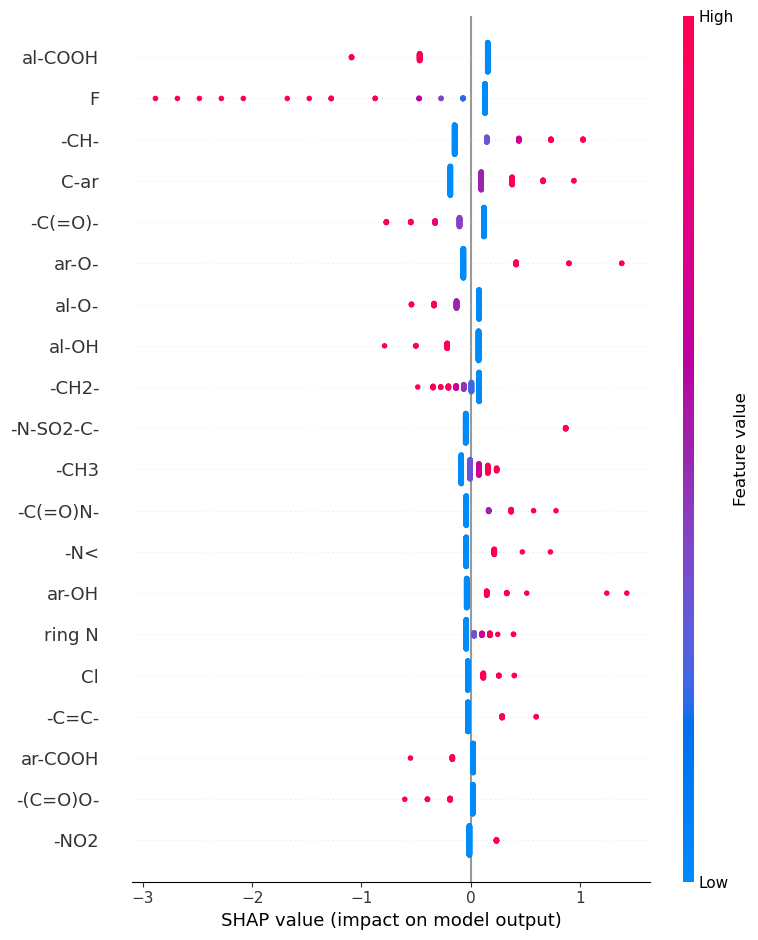

In [13]:
# 可视化SHAP值，你可以选择不同的方式来可视化，比如汇总图、水平条形图等
shap.summary_plot(shap_values, X_train)
